# Smartphone Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Data Preparation and Cleaning

In [2]:
pd.set_option('display.max_columns', None)
raw_data = pd.read_csv(r'smartphones_cleaned_v6.csv')
raw_data

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,5000.0,1,100.0,12.0,256.0,6.70,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,33.0,6.0,128.0,6.59,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,5000.0,1,15.0,4.0,64.0,6.60,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,NaN,6.0,128.0,6.55,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,5000.0,1,67.0,6.0,128.0,6.70,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,5000.0,1,68.0,8.0,128.0,6.67,120,3,1.0,android,64.0,16.0,0,NaN,1080,2460
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,22.0,6.0,128.0,6.50,60,3,1.0,android,48.0,8.0,1,1024.0,720,1600
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,5080.0,1,67.0,8.0,256.0,6.60,144,3,1.0,android,64.0,16.0,0,NaN,1080,2460
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8.0,2.20,5000.0,1,NaN,6.0,128.0,6.80,60,3,1.0,android,108.0,32.0,1,1024.0,1080,2400


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [4]:
raw_data['resolution_width'] = raw_data['resolution_width'].astype(str)
raw_data['resolution_height'] = raw_data['resolution_height'].astype(str)

raw_data['resolution'] = raw_data['resolution_height'] + 'x' + raw_data['resolution_width']
raw_data

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height,resolution
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.20,5000.0,1,100.0,12.0,256.0,6.70,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216,3216x1440
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,33.0,6.0,128.0,6.59,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412,2412x1080
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.40,5000.0,1,15.0,4.0,64.0,6.60,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408,2408x1080
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,NaN,6.0,128.0,6.55,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400,2400x1080
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.60,5000.0,1,67.0,6.0,128.0,6.70,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412,2412x1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,5000.0,1,68.0,8.0,128.0,6.67,120,3,1.0,android,64.0,16.0,0,NaN,1080,2460,2460x1080
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,22.0,6.0,128.0,6.50,60,3,1.0,android,48.0,8.0,1,1024.0,720,1600,1600x720
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,5080.0,1,67.0,8.0,256.0,6.60,144,3,1.0,android,64.0,16.0,0,NaN,1080,2460,2460x1080
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8.0,2.20,5000.0,1,NaN,6.0,128.0,6.80,60,3,1.0,android,108.0,32.0,1,1024.0,1080,2400,2400x1080


In [5]:
data = raw_data[['brand_name', 'model', 'price', 'rating', 'processor_speed', 'battery_capacity',
                 'ram_capacity', 'screen_size', 'internal_memory', 'os', 'primary_camera_rear',
                 'primary_camera_front', 'resolution']].copy()
data

,brand_name,model,price,rating,processor_speed,battery_capacity,ram_capacity,screen_size,internal_memory,os,primary_camera_rear,primary_camera_front,resolution
0,oneplus,OnePlus 11 5G,54999,89.0,3.20,5000.0,12.0,6.70,256.0,android,50.0,16.0,3216x1440
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,2.20,5000.0,6.0,6.59,128.0,android,64.0,16.0,2412x1080
2,samsung,Samsung Galaxy A14 5G,16499,75.0,2.40,5000.0,4.0,6.60,64.0,android,50.0,13.0,2408x1080
3,motorola,Motorola Moto G62 5G,14999,81.0,2.20,5000.0,6.0,6.55,128.0,android,50.0,16.0,2400x1080
4,realme,Realme 10 Pro Plus,24999,82.0,2.60,5000.0,6.0,6.70,128.0,android,108.0,16.0,2412x1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,3.00,5000.0,8.0,6.67,128.0,android,64.0,16.0,2460x1080
976,honor,Honor X8 5G,14990,75.0,2.20,5000.0,6.0,6.50,128.0,android,48.0,8.0,1600x720
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,2.85,5080.0,8.0,6.60,256.0,android,64.0,16.0,2460x1080
978,motorola,Motorola Moto G91 5G,19990,80.0,2.20,5000.0,6.0,6.80,128.0,android,108.0,32.0,2400x1080


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

brand_name                0
model                     0
price                     0
rating                  101
processor_speed          42
battery_capacity         11
ram_capacity              0
screen_size               0
internal_memory           0
os                       14
primary_camera_rear       0
primary_camera_front      5
resolution                0
dtype: int64

In [8]:
data.dropna(inplace=True)
data.isnull().sum()

brand_name              0
model                   0
price                   0
rating                  0
processor_speed         0
battery_capacity        0
ram_capacity            0
screen_size             0
internal_memory         0
os                      0
primary_camera_rear     0
primary_camera_front    0
resolution              0
dtype: int64

In [9]:
data.dtypes

brand_name               object
model                    object
price                     int64
rating                  float64
processor_speed         float64
battery_capacity        float64
ram_capacity            float64
screen_size             float64
internal_memory         float64
os                       object
primary_camera_rear     float64
primary_camera_front    float64
resolution               object
dtype: object

In [10]:
data['brand_name'] = data['brand_name'].astype('string')
data['model'] = data['model'].astype('string')
data['resolution'] = data['resolution'].astype('string')
data['os'] = data['os'].astype('category')
data['rating'] = data['rating'].astype(int)
data['battery_capacity'] = data['battery_capacity'].astype(int)
data['ram_capacity'] = data['ram_capacity'].astype('category')
data['internal_memory'] = data['internal_memory'].astype('category')
data['primary_camera_rear'] = data['primary_camera_rear'].astype(int)
data['primary_camera_front'] = data['primary_camera_front'].astype(int)

In [11]:
data.dtypes

brand_name                string
model                     string
price                      int64
rating                     int32
processor_speed          float64
battery_capacity           int32
ram_capacity            category
screen_size              float64
internal_memory         category
os                      category
primary_camera_rear        int32
primary_camera_front       int32
resolution                string
dtype: object

In [12]:
data.columns

Index(['brand_name', 'model', 'price', 'rating', 'processor_speed',
       'battery_capacity', 'ram_capacity', 'screen_size', 'internal_memory',
       'os', 'primary_camera_rear', 'primary_camera_front', 'resolution'],
      dtype='object')

In [13]:
data.rename(columns = {'price':'price(INR)',
            'battery_capacity':'battery_capacity(mAh)',
            'ram_capacity':'ram_capacity(GB)',
            'screen_size':'screen_size(inches)',
            'internal_memory':'internal_memory(GB)',
            'primary_camera_rear':'primary_camera_rear(MP)',
            'primary_camera_front':'primary_camera_front(MP)',
            'resolution':'resolution(pixels)'}, inplace=True)

data.columns

Index(['brand_name', 'model', 'price(INR)', 'rating', 'processor_speed',
       'battery_capacity(mAh)', 'ram_capacity(GB)', 'screen_size(inches)',
       'internal_memory(GB)', 'os', 'primary_camera_rear(MP)',
       'primary_camera_front(MP)', 'resolution(pixels)'],
      dtype='object')

In [14]:
data.reset_index(drop=True, inplace=True)

In [15]:
data

,brand_name,model,price(INR),rating,processor_speed,battery_capacity(mAh),ram_capacity(GB),screen_size(inches),internal_memory(GB),os,primary_camera_rear(MP),primary_camera_front(MP),resolution(pixels)
0,oneplus,OnePlus 11 5G,54999,89,3.20,5000,12.0,6.70,256.0,android,50,16,3216x1440
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81,2.20,5000,6.0,6.59,128.0,android,64,16,2412x1080
2,samsung,Samsung Galaxy A14 5G,16499,75,2.40,5000,4.0,6.60,64.0,android,50,13,2408x1080
3,motorola,Motorola Moto G62 5G,14999,81,2.20,5000,6.0,6.55,128.0,android,50,16,2400x1080
4,realme,Realme 10 Pro Plus,24999,82,2.60,5000,6.0,6.70,128.0,android,108,16,2412x1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,oppo,Oppo Find X6,69990,89,3.20,4700,8.0,6.73,256.0,android,50,32,2400x1080
818,motorola,Motorola Moto Edge S30 Pro,34990,83,3.00,5000,8.0,6.67,128.0,android,64,16,2460x1080
819,honor,Honor X8 5G,14990,75,2.20,5000,6.0,6.50,128.0,android,48,8,1600x720
820,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85,2.85,5080,8.0,6.60,256.0,android,64,16,2460x1080


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   brand_name                822 non-null    string  
 1   model                     822 non-null    string  
 2   price(INR)                822 non-null    int64   
 3   rating                    822 non-null    int32   
 4   processor_speed           822 non-null    float64 
 5   battery_capacity(mAh)     822 non-null    int32   
 6   ram_capacity(GB)          822 non-null    category
 7   screen_size(inches)       822 non-null    float64 
 8   internal_memory(GB)       822 non-null    category
 9   os                        822 non-null    category
 10  primary_camera_rear(MP)   822 non-null    int32   
 11  primary_camera_front(MP)  822 non-null    int32   
 12  resolution(pixels)        822 non-null    string  
dtypes: category(3), float64(2), int32(4), int64(1), st

In [17]:
data.describe()

,price(INR),rating,processor_speed,battery_capacity(mAh),screen_size(inches),primary_camera_rear(MP),primary_camera_front(MP)
count,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000
mean,26704.964720,78.405109,2.407129,4878.618005,6.545742,50.249392,16.223844
std,34479.075052,7.397542,0.419960,1011.658525,0.214713,29.007074,10.144679
min,3499.000000,60.000000,1.300000,1821.000000,4.700000,8.000000,2.000000
25%,12999.000000,74.000000,2.050000,4500.000000,6.500000,48.000000,8.000000
50%,18990.000000,80.000000,2.300000,5000.000000,6.560000,50.000000,16.000000
75%,29990.000000,84.000000,2.730000,5000.000000,6.670000,64.000000,16.000000
max,650000.000000,89.000000,3.220000,22000.000000,7.600000,200.000000,60.000000


# Exploratory Analysis and Visualization

In [18]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14,5)

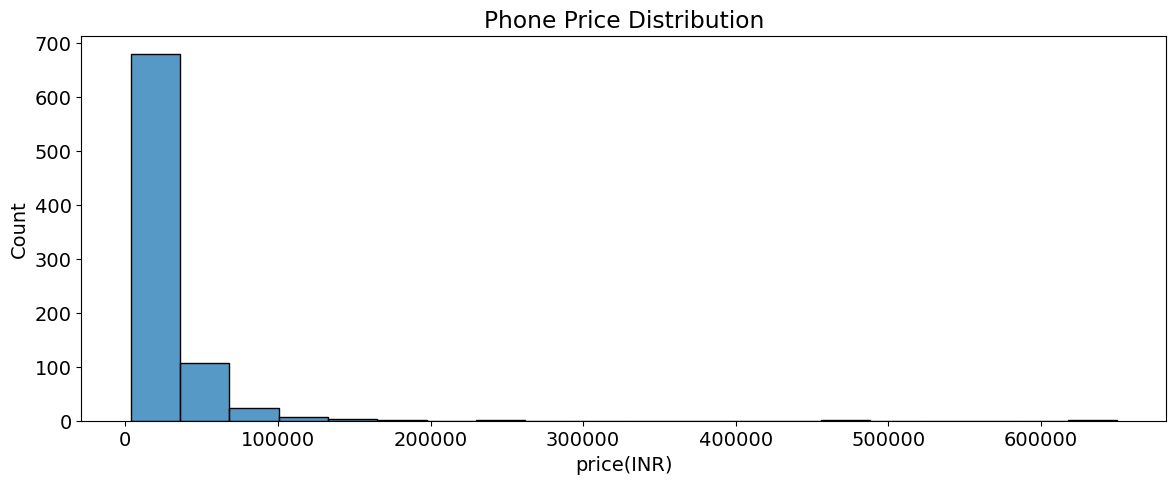

In [19]:
plt.title('Phone Price Distribution')
sns.histplot(data=data, x='price(INR)', bins=20);

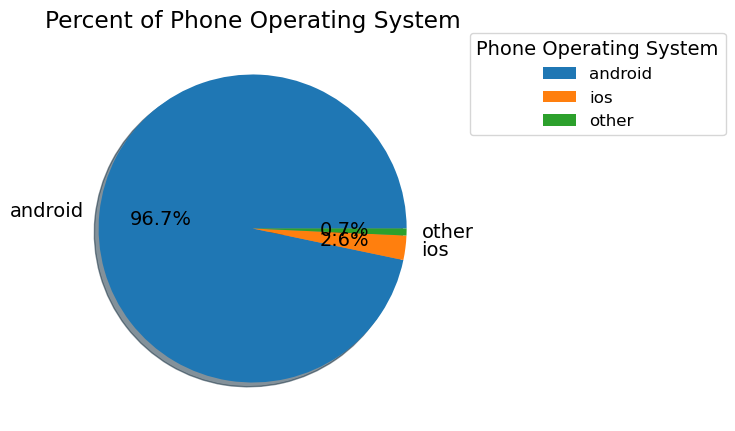

In [20]:
plt.pie(x=data['os'].value_counts(), labels=data['os'].unique(), shadow=True, autopct ='%.1f%%')
plt.legend(title='Phone Operating System', loc = 4,fontsize  = 12, bbox_to_anchor =(1.75, 0.72), ncol = 1)
plt.title('Percent of Phone Operating System');

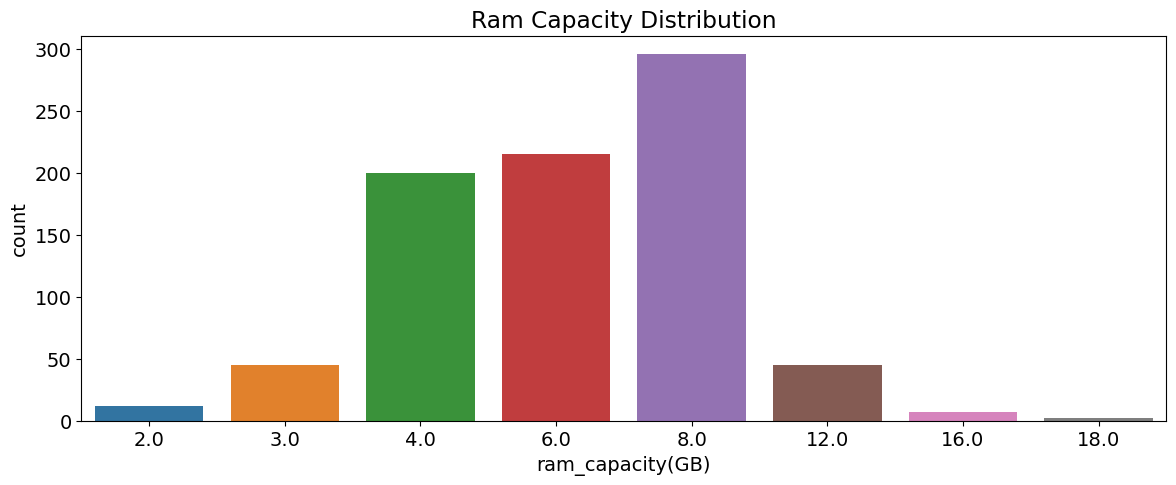

In [21]:
sns.countplot(data=data, x='ram_capacity(GB)')
plt.title('Ram Capacity Distribution');

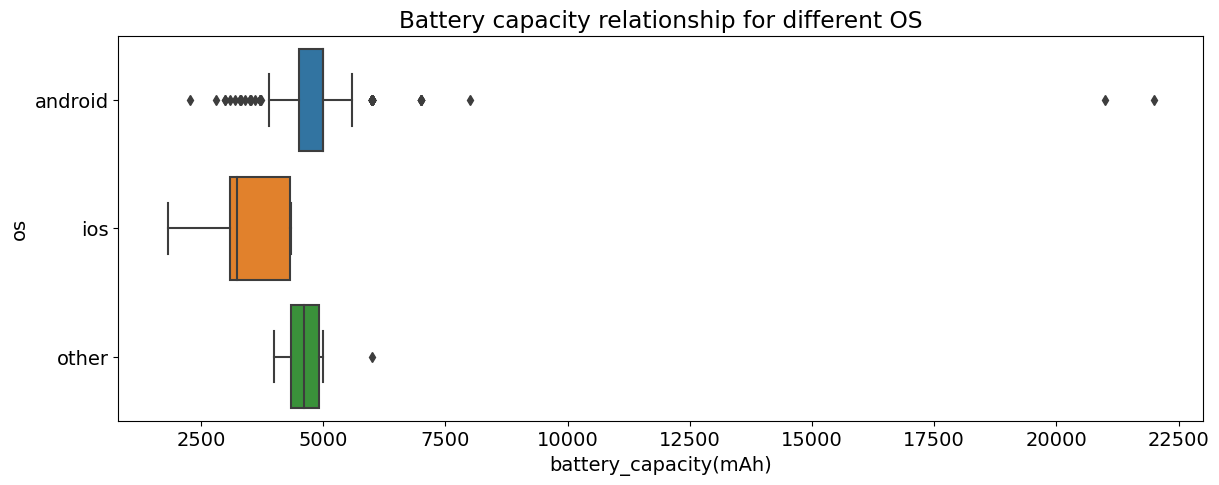

In [22]:
sns.boxplot(data=data, y='os', x='battery_capacity(mAh)')
plt.title('Battery capacity relationship for different OS');

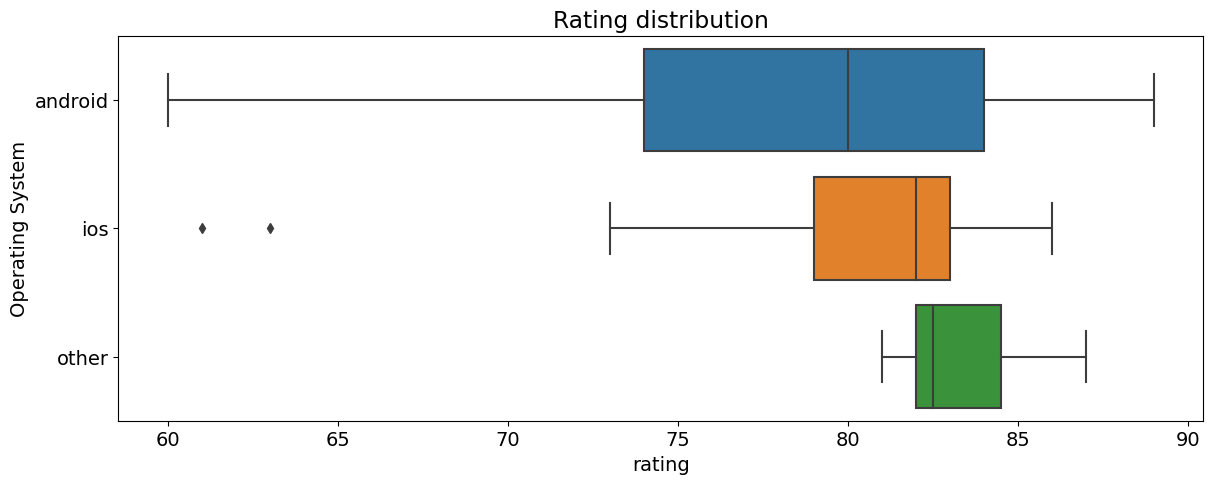

In [23]:
sns.boxplot(data=data, x='rating', y='os')
plt.title('Rating distribution')
plt.ylabel('Operating System');

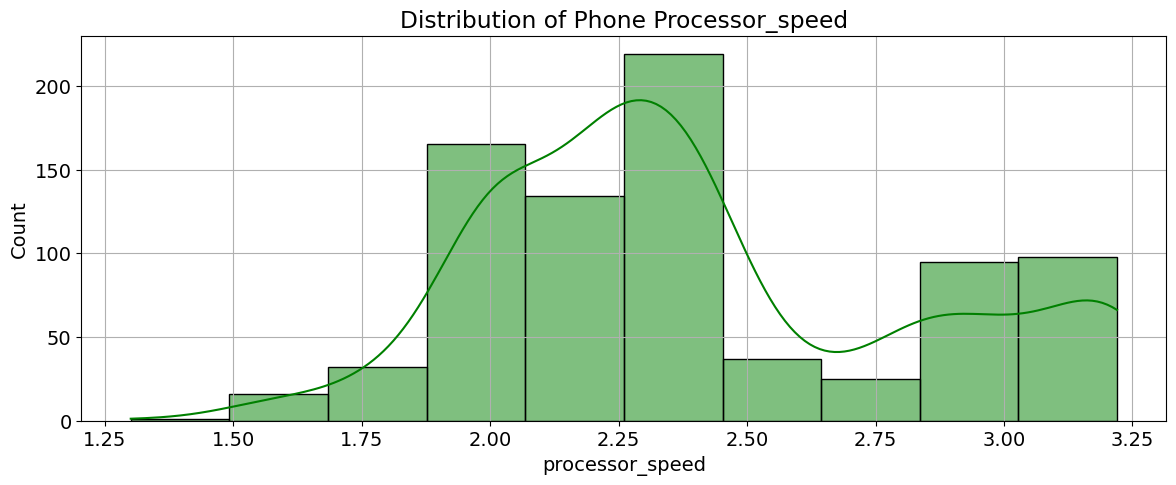

In [24]:
sns.histplot(data=data, x='processor_speed', bins=10, kde=True, color='green')
plt.title('Distribution of Phone Processor_speed')
plt.grid();

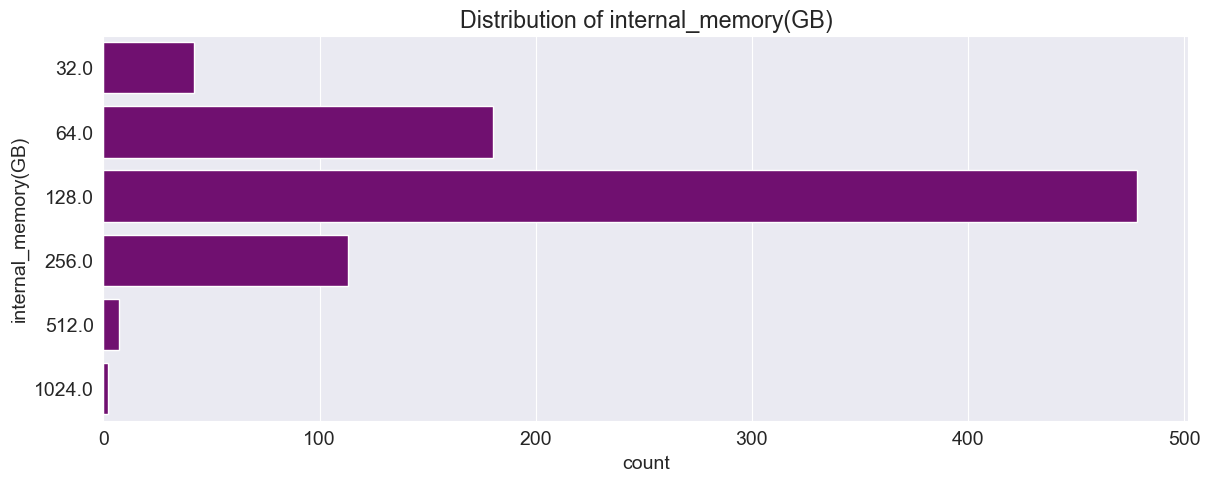

In [25]:
sns.set_style('darkgrid')
sns.countplot(data=data, y='internal_memory(GB)', color='purple')
plt.title('Distribution of internal_memory(GB)');

# Questions and Answers

## 1. How many Phone Brand are there in the dataset?

In [26]:
a = data.brand_name.nunique()
a

42

In [27]:
print('''
1. How many Phone Brand are there in the dataset?
Answer: {} brands'''.format(a))


1. How many Phone Brand are there in the dataset?
Answer: 42 brands


## 2. names of phone models with 2400x1080 pixels?

In [28]:
b = data[data['resolution(pixels)'] == '2400x1080']
b.head(3)

,brand_name,model,price(INR),rating,processor_speed,battery_capacity(mAh),ram_capacity(GB),screen_size(inches),internal_memory(GB),os,primary_camera_rear(MP),primary_camera_front(MP),resolution(pixels)
3,motorola,Motorola Moto G62 5G,14999,81,2.2,5000,6.0,6.55,128.0,android,50,16,2400x1080
7,xiaomi,Xiaomi Redmi Note 12 Pro Plus,29999,86,2.6,4980,8.0,6.67,256.0,android,200,16,2400x1080
8,nothing,Nothing Phone 1,26749,85,2.5,4500,8.0,6.55,128.0,android,50,16,2400x1080


In [29]:
b.shape

(321, 13)

In [30]:
print('''
2. names of phone models with 2400x1080 pixels?
Answers: {} phones'''.format(b.shape[0]))


2. names of phone models with 2400x1080 pixels?
Answers: 321 phones


## 3. What's the name of the most expensive phone and the price?

In [31]:
c = data[data['price(INR)']==data['price(INR)'].max()]
c

,brand_name,model,price(INR),rating,processor_speed,battery_capacity(mAh),ram_capacity(GB),screen_size(inches),internal_memory(GB),os,primary_camera_rear(MP),primary_camera_front(MP),resolution(pixels)
358,vertu,Vertu Signature Touch,650000,62,1.5,2275,2.0,4.7,64.0,android,13,2,1920x1080


In [32]:
c['model'].unique()[0]

'Vertu Signature Touch'

In [33]:
print('''
3. What's the name of the most expensive phone and the price?
Answers: {} phone with a price of {}INR'''.format(c['model'].unique()[0], c['price(INR)'].unique()[0]))


3. What's the name of the most expensive phone and the price?
Answers: Vertu Signature Touch phone with a price of 650000INR


## 4. Top 10 Phone with the lowest rating?

In [34]:
d = data.sort_values('rating').reset_index(drop=True)
d.head(10)

,brand_name,model,price(INR),rating,processor_speed,battery_capacity(mAh),ram_capacity(GB),screen_size(inches),internal_memory(GB),os,primary_camera_rear(MP),primary_camera_front(MP),resolution(pixels)
0,infinix,Infinix Smart 6,7320,60,2.00,5000,2.0,6.60,64.0,android,8,5,1600x720
1,micromax,Micromax IN 2C,5999,60,1.80,5000,3.0,6.52,32.0,android,8,5,1600x720
2,tcl,TCL Ion X,8990,60,2.00,3000,3.0,6.00,32.0,android,13,5,1440x720
3,letv,Letv Y1 Pro Plus,5999,60,1.80,4000,6.0,6.50,64.0,android,8,5,1560x720
4,vivo,Vivo Y01A,7790,60,2.30,5000,2.0,6.51,32.0,android,8,5,1600x720
5,lyf,Lyf Earth 1,3990,60,1.50,3500,3.0,5.50,32.0,android,13,5,1920x1080
6,realme,Realme C30 (3GB RAM + 32GB),6299,60,1.82,5000,3.0,6.50,32.0,android,8,5,1600x720
7,ikall,iKall Z19 Pro,8099,60,1.60,5000,4.0,6.50,64.0,android,13,8,1600x720
8,xiaomi,Xiaomi Redmi A1 Plus,7289,60,2.00,5000,2.0,6.52,32.0,android,8,5,1600x720
9,realme,Realme C11 2021,6499,61,1.60,5000,2.0,6.52,32.0,android,8,5,1600x720


In [35]:
d.head(10).model.unique()

<StringArray>
[            'Infinix Smart 6',              'Micromax IN 2C',
                   'TCL Ion X',            'Letv Y1 Pro Plus',
                   'Vivo Y01A',                 'Lyf Earth 1',
 'Realme C30 (3GB RAM + 32GB)',               'iKall Z19 Pro',
        'Xiaomi Redmi A1 Plus',             'Realme C11 2021']
Length: 10, dtype: string

In [36]:
print('''
Top 10 Phone with the lowest rating?
Answer:
{}'''.format(d.head(10).model))


Top 10 Phone with the lowest rating?
Answer:
0                Infinix Smart 6
1                 Micromax IN 2C
2                      TCL Ion X
3               Letv Y1 Pro Plus
4                      Vivo Y01A
5                    Lyf Earth 1
6    Realme C30 (3GB RAM + 32GB)
7                  iKall Z19 Pro
8           Xiaomi Redmi A1 Plus
9                Realme C11 2021
Name: model, dtype: string


## 5. What's the average processor speed of phones with 4GB ram?

In [37]:
e = data[data['ram_capacity(GB)'] ==  4.0]
e.sample(5)

,brand_name,model,price(INR),rating,processor_speed,battery_capacity(mAh),ram_capacity(GB),screen_size(inches),internal_memory(GB),os,primary_camera_rear(MP),primary_camera_front(MP),resolution(pixels)
427,poco,POCO M3 Pro 5G,15999,75,2.20,5000,4.0,6.50,64.0,android,48,8,2400x1080
507,xiaomi,Xiaomi Redmi Note 12 4G,13999,75,2.20,5000,4.0,6.67,64.0,android,48,13,2400x1080
338,realme,Realme 9i (4GB RAM + 128GB),13999,75,2.40,5000,4.0,6.60,128.0,android,50,16,2412x1080
790,samsung,Samsung Galaxy F12,10499,73,2.00,6000,4.0,6.50,64.0,android,48,8,1600x720
14,apple,Apple iPhone 13,62999,79,3.22,3240,4.0,6.10,128.0,ios,12,12,2532x1170


In [38]:
e1 = np.mean(e.processor_speed)
int(e1)

2

In [39]:
print('''
5. What's the average processor speed of phones with 4GB ram?
Answer: {}'''.format(int(e1)))


5. What's the average processor speed of phones with 4GB ram?
Answer: 2


## THE END!